## Jorge P. Rodríguez, 2023

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
plt.style.use('classic')
import matplotlib.colors as colors
import matplotlib.colorbar as chi
import math

In [3]:
df = pd.read_csv('./data/routing_tev_Ntimearea_bylon.csv')

In [4]:
df.head()

,ilon,2020-01-01T00:00:00.000000000_N,2020-01-01T00:00:00.000000000_t,2020-01-01T00:00:00.000000000_A,2020-02-01T00:00:00.000000000_N,2020-02-01T00:00:00.000000000_t,2020-02-01T00:00:00.000000000_A,2020-03-01T00:00:00.000000000_N,2020-03-01T00:00:00.000000000_t,2020-03-01T00:00:00.000000000_A,...,2022-01-01T00:00:00.000000000_A,2022-02-01T00:00:00.000000000_N,2022-02-01T00:00:00.000000000_t,2022-02-01T00:00:00.000000000_A,2022-03-01T00:00:00.000000000_N,2022-03-01T00:00:00.000000000_t,2022-03-01T00:00:00.000000000_A,2022-04-01T00:00:00.000000000_N,2022-04-01T00:00:00.000000000_t,2022-04-01T00:00:00.000000000_A
0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,49.401503,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
1,1,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,147.610809,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
2,2,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,49.005553,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
3,3,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,97.614709,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
4,4,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,97.218014,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0


In [5]:
print(df['2020-01-01T00:00:00.000000000_t'].sum())

1287719.0


In [6]:
utimes = list(df.columns)
utimes.remove('ilon')
utimes2 = []
utimes3 = []
for elem in utimes:
    utimes2.append(pd.to_datetime(elem[:-4]))
    utimes3.append(elem[:-2])
utimes2 = np.unique(utimes2)
utimes3 = np.unique(utimes3)
utimes2.sort()
utimes3.sort()
print(len(utimes2))
print(utimes2)
print(utimes3)

28
[Timestamp('2020-01-01 00:00:00') Timestamp('2020-02-01 00:00:00')
 Timestamp('2020-03-01 00:00:00') Timestamp('2020-04-01 00:00:00')
 Timestamp('2020-05-01 00:00:00') Timestamp('2020-06-01 00:00:00')
 Timestamp('2020-07-01 00:00:00') Timestamp('2020-08-01 00:00:00')
 Timestamp('2020-09-01 00:00:00') Timestamp('2020-10-01 00:00:00')
 Timestamp('2020-11-01 00:00:00') Timestamp('2020-12-01 00:00:00')
 Timestamp('2021-01-01 00:00:00') Timestamp('2021-02-01 00:00:00')
 Timestamp('2021-03-01 00:00:00') Timestamp('2021-04-01 00:00:00')
 Timestamp('2021-05-01 00:00:00') Timestamp('2021-06-01 00:00:00')
 Timestamp('2021-07-01 00:00:00') Timestamp('2021-08-01 00:00:00')
 Timestamp('2021-09-01 00:00:00') Timestamp('2021-10-01 00:00:00')
 Timestamp('2021-11-01 00:00:00') Timestamp('2021-12-01 00:00:00')
 Timestamp('2022-01-01 00:00:00') Timestamp('2022-02-01 00:00:00')
 Timestamp('2022-03-01 00:00:00') Timestamp('2022-04-01 00:00:00')]
['2020-01-01T00:00:00.000000000' '2020-02-01T00:00:00.0000

In [7]:
df.head()

,ilon,2020-01-01T00:00:00.000000000_N,2020-01-01T00:00:00.000000000_t,2020-01-01T00:00:00.000000000_A,2020-02-01T00:00:00.000000000_N,2020-02-01T00:00:00.000000000_t,2020-02-01T00:00:00.000000000_A,2020-03-01T00:00:00.000000000_N,2020-03-01T00:00:00.000000000_t,2020-03-01T00:00:00.000000000_A,...,2022-01-01T00:00:00.000000000_A,2022-02-01T00:00:00.000000000_N,2022-02-01T00:00:00.000000000_t,2022-02-01T00:00:00.000000000_A,2022-03-01T00:00:00.000000000_N,2022-03-01T00:00:00.000000000_t,2022-03-01T00:00:00.000000000_A,2022-04-01T00:00:00.000000000_N,2022-04-01T00:00:00.000000000_t,2022-04-01T00:00:00.000000000_A
0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,49.401503,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
1,1,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,147.610809,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
2,2,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,49.005553,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
3,3,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,97.614709,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
4,4,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,97.218014,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0


In [8]:
for t in utimes3:
    rhos = []
    for tt,ta in zip(df[f'{t}_t'].values,df[f'{t}_A'].values):
        if tt > 0.0:
            rhos.append(tt/ta)
        else:
            rhos.append(0.0)
    df[f'{t}_rho'] = rhos

In [9]:
avrhos = []
avls = []
dl = 6371.*0.1*np.pi/180.0
for t in utimes3:
    avrhos.append(list(df[f'{t}_rho']))
    avls.append(list(df[f'{t}_N']*dl))

In [10]:
print(avrhos[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [11]:
print(np.amin(avrhos),np.amax(avrhos))
print(np.amin(avls),np.amax(avls))

0.0 10650.635041903866
0.0 1123.0687591100434


In [12]:
cnorm = colors.LogNorm(vmin=1e-3,vmax=np.amax(avrhos)/10)
cnorm2 = colors.LogNorm(vmin=10,vmax=np.amax(avls))
cmap = plt.get_cmap('viridis')
cmap = cmap.set_under('w')

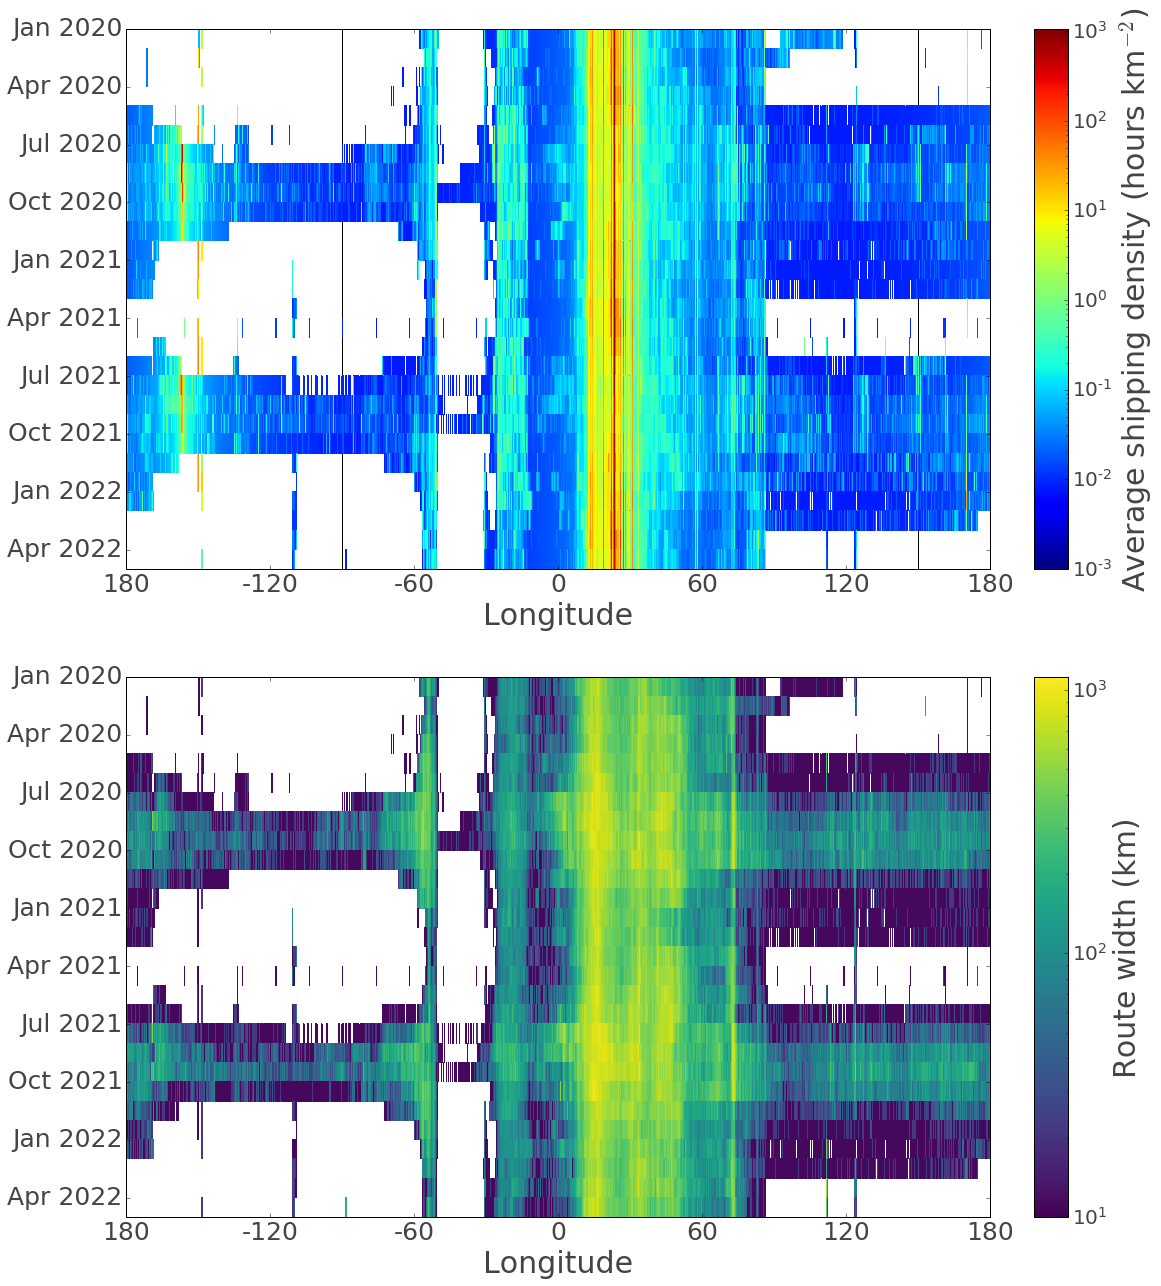

In [13]:
fig = plt.figure(figsize=(12,15))
fig.set_facecolor('w')
ax = plt.gca()
ax.set_position([0.,0.6,1,0.5])
plt.pcolormesh(avrhos,cmap='jet',norm=cnorm)
plt.xlim(0,3600)
plt.ylim(0,28)
plt.xticks([0,600,1200,1800,2400,3000,3600],[180,-120,-60,0,60,120,180],size=25,
          color='#444444')
plt.xlabel('Longitude',color='#444444',size=30)
plt.yticks([0,3,6,9,12,15,18,21,24,27],
           ['Jan 2020','Apr 2020',
            'Jul 2020','Oct 2020',
            'Jan 2021','Apr 2021',
            'Jul 2021','Oct 2021',
            'Jan 2022','Apr 2022'],color='#444444',size=25)
plt.plot([1800+1499,1800+1500,1800+1500,1800+1499,1800+1499],[0,0,28,28,0],color='k',zorder=0.5)
plt.plot([1800-900,1800-901,1800-901,1800-900,1800-900],[0,0,28,28,0],color='k',zorder=0.5)
ax.invert_yaxis()
axc = fig.add_axes([1.05,0.6,0.04,0.5])

clb=chi.ColorbarBase(axc,cmap=plt.get_cmap('jet'),norm=cnorm,orientation='vertical')
clb.set_label(r'Average shipping density (hours km$^{-2}$)', fontsize=30,color='#444444')
plt.yticks(color='#444444')
clb.ax.tick_params(labelsize=20)

ax2 = fig.add_axes([0.,0,1,0.5])
h = plt.pcolormesh(avls,cmap = 'viridis',norm=cnorm2)
cmap = h.get_cmap()
cmap.set_under('w')
plt.xlim(0,3600)
plt.ylim(0,28)
plt.xticks([0,600,1200,1800,2400,3000,3600],[180,-120,-60,0,60,120,180],size=25,
          color='#444444')
plt.xlabel('Longitude',color='#444444',size=30)
plt.yticks([0,3,6,9,12,15,18,21,24,27],
           ['Jan 2020','Apr 2020',
            'Jul 2020','Oct 2020',
            'Jan 2021','Apr 2021',
            'Jul 2021','Oct 2021',
            'Jan 2022','Apr 2022'],color='#444444',size=25)
ax2.invert_yaxis()
axc2 = fig.add_axes([1.05,0.,0.04,0.5])

clb2=chi.ColorbarBase(axc2,cmap=plt.get_cmap('viridis'),norm=cnorm2,orientation='vertical')
clb2.set_label(r'Route width (km)', fontsize=30,color='#444444')
plt.yticks(color='#444444')
clb2.ax.tick_params(labelsize=20)
fig.savefig('fig5.png',dpi=300,bbox_inches='tight')
fig.savefig('fig5.pdf',dpi=300,bbox_inches='tight',fmt='pdf');